In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("layoffs_data.csv")

df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,2023-06-25 23:04:16,United States,NaN,Unknown
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,2023-06-22 14:23:40,United States,NaN,Unknown
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,2023-06-24 03:48:00,United States,300.0,Unknown
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,2023-06-22 00:19:03,United States,200.0,Unknown
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,2023-06-23 15:38:59,United States,75.0,Unknown


## Preliminary Analysis of Data

In [4]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date', 'Source',
       'Funds_Raised', 'Stage', 'Date_Added', 'Country', 'Laid_Off_Count',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [5]:
df = df[['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date', 'Source',
       'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count']]

In [7]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Country,Laid_Off_Count
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,United States,NaN
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,United States,NaN
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,United States,300.0
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,United States,200.0
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,United States,75.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         2738 non-null   object 
 1   Location_HQ     2738 non-null   object 
 2   Industry        2738 non-null   object 
 3   Percentage      1819 non-null   float64
 4   Date            2738 non-null   object 
 5   Source          2738 non-null   object 
 6   Funds_Raised    2466 non-null   float64
 7   Stage           2738 non-null   object 
 8   Country         2738 non-null   object 
 9   Laid_Off_Count  1871 non-null   float64
dtypes: float64(3), object(7)
memory usage: 214.0+ KB


In [10]:
df.describe(exclude='O')

,Percentage,Funds_Raised,Laid_Off_Count
count,1819.000000,2466.000000,1871.000000
mean,0.265282,805.994118,252.405665
std,0.265125,5295.209903,818.989438
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


In [12]:
df.duplicated().sum()

0

In [15]:
# finding which row is duplicated

df[df.duplicated()]

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Country,Laid_Off_Count


In [16]:
# droping the duplicate values

df.drop_duplicates(inplace=True)

In [17]:
# finding the missing values by columns

df.isnull().sum()

Company             0
Location_HQ         0
Industry            0
Percentage        919
Date                0
Source              0
Funds_Raised      272
Stage               0
Country             0
Laid_Off_Count    867
dtype: int64

In [18]:
# percentage of missing values

df.isnull().sum()/len(df)*100

Company            0.000000
Location_HQ        0.000000
Industry           0.000000
Percentage        33.564646
Date               0.000000
Source             0.000000
Funds_Raised       9.934259
Stage              0.000000
Country            0.000000
Laid_Off_Count    31.665449
dtype: float64

In [20]:
df.Percentage = df.Percentage.replace(np.NaN,0)
df.Funds_Raised = df.Funds_Raised.replace(np.NaN,0)
df.Laid_Off_Count = df.Laid_Off_Count.replace(np.NaN,0)
df.dropna(inplace=True)
df.isnull().sum()

Company           0
Location_HQ       0
Industry          0
Percentage        0
Date              0
Source            0
Funds_Raised      0
Stage             0
Country           0
Laid_Off_Count    0
dtype: int64

In [21]:
import datetime as dt

In [22]:
# converting Date column into datetime and makin new column year and month

df.Date = pd.to_datetime(df.Date)

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month_name()
df['Quarter'] = df.Date.dt.to_period('Q')

In [23]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Month,Quarter
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,United States,0.0,2023,June,2023Q2
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,United States,0.0,2023,June,2023Q2
2,Anaplan,SF Bay Area,Other,0.00,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,United States,300.0,2023,June,2023Q2
3,Uber,SF Bay Area,Transportation,0.00,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,United States,200.0,2023,June,2023Q2
4,Tackle.io,Boise,Infrastructure,0.00,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,United States,75.0,2023,June,2023Q2


## Exploratory Data Analysis

In [25]:
df['Industry'].unique()

array(['Consumer', 'Other', 'Transportation', 'Infrastructure', 'Food',
       'Healthcare', 'Marketing', 'Media', 'HR', 'Retail', 'Crypto',
       'Education', 'Finance', 'Security', 'Product', 'Sales', 'Data',
       'Support', 'Real Estate', 'Aerospace', 'Manufacturing',
       'Logistics', 'Recruiting', 'Hardware', 'Legal', 'Travel',
       'Construction', 'Energy', 'Fitness'], dtype=object)

In [29]:
df.groupby('Industry')['Percentage'].sum().sort_values(ascending = False).reset_index()

,Industry,Percentage
0,Finance,57.5850
1,Healthcare,46.0500
2,Retail,39.5000
3,Food,36.4950
4,Transportation,29.1040
5,Crypto,29.0000
6,Real Estate,25.2800
7,Consumer,24.5300
8,Other,24.2200
9,Education,23.0600


In [33]:
df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending = False).reset_index()

,Industry,Laid_Off_Count
0,Retail,57655.0
1,Consumer,56620.0
2,Other,40910.0
3,Transportation,40013.0
4,Food,35866.0
5,Finance,32656.0
6,Healthcare,32477.0
7,Hardware,25298.0
8,Real Estate,18482.0
9,Travel,18259.0


In [36]:
df.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending = False).reset_index()

,Stage,Laid_Off_Count
0,Post-IPO,253901.0
1,Unknown,44267.0
2,Acquired,42092.0
3,Series B,26295.0
4,Series C,21655.0
5,Series D,20829.0
6,Series E,14043.0
7,Series F,11077.0
8,Private Equity,9267.0
9,Series H,7344.0


In [37]:
df.groupby('Stage')['Percentage'].sum().sort_values(ascending = False).reset_index()

,Stage,Percentage
0,Unknown,93.4500
1,Series B,77.0600
2,Post-IPO,59.6885
3,Series A,54.0500
4,Series C,53.5100
5,Seed,42.5200
6,Series D,35.5650
7,Acquired,31.0040
8,Series E,17.0300
9,Series F,6.2300


In [38]:
df.groupby('Year')['Laid_Off_Count'].sum().sort_values(ascending = False).reset_index()

,Year,Laid_Off_Count
0,2023,210721.0
1,2022,164709.0
2,2020,80998.0
3,2021,15823.0


In [39]:
df.groupby('Year')['Percentage'].sum().sort_values(ascending = False).reset_index()

,Year,Percentage
0,2022,204.5450
1,2023,137.3500
2,2020,129.6725
3,2021,10.9800


In [40]:
df.groupby('Month')['Percentage'].sum().sort_values(ascending = False).reset_index()

,Month,Percentage
0,April,76.6300
1,June,63.2700
2,May,55.7600
3,March,48.8900
4,November,45.2800
5,January,41.3900
6,February,30.1100
7,August,28.0485
8,July,27.2700
9,October,24.5400


In [41]:
df.groupby('Quarter')['Percentage'].sum().sort_values(ascending = False).reset_index()

,Quarter,Percentage
0,2022Q4,83.7000
1,2020Q2,81.9300
2,2023Q1,79.2800
3,2022Q3,61.8550
4,2023Q2,58.0700
5,2022Q2,53.5900
6,2020Q1,29.8100
7,2020Q3,11.7325
8,2020Q4,6.2000
9,2021Q1,5.9000


In [42]:
df.groupby('Country')['Percentage'].sum().sort_values(ascending = False).reset_index()

,Country,Percentage
0,United States,298.9525
1,India,34.3900
2,Canada,19.7100
3,Australia,19.6600
4,United Kingdom,19.6600
...,...,...
57,Czech Republic,0.0000
58,South Africa,0.0000
59,Japan,0.0000
60,Romania,0.0000


c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


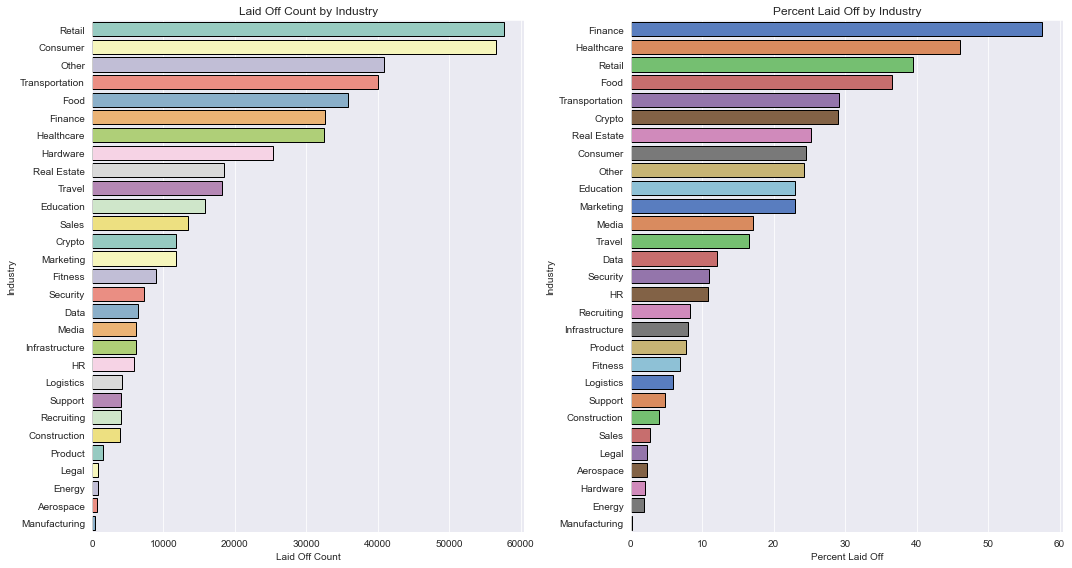

In [51]:
fig, ax = plt.subplots(1, 2,figsize=(15,8))

ax[0] = sns.barplot(data=df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index(), 
            y='Industry', x='Laid_Off_Count',edgecolor='black', palette='Set3', ax=ax[0])
ax[0].set(title='Laid Off Count by Industry', xlabel='Laid Off Count')

ax[1] = sns.barplot(data=df.groupby('Industry')['Percentage'].sum().sort_values(ascending=False).reset_index(), 
            y='Industry', x='Percentage', edgecolor='black', palette='muted', ax=ax[1])
ax[1].set(title='Percent Laid Off by Industry', xlabel='Percent Laid Off')
plt.tight_layout()

fig.show()

c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


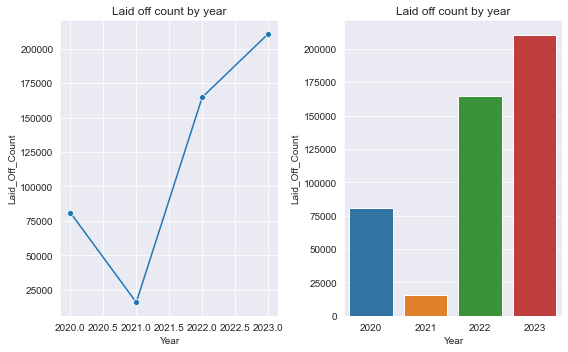

In [73]:
fig, ax = plt.subplots(1, 2,figsize=(8,5))

ax[0] = sns.lineplot(data = df.groupby('Year')['Laid_Off_Count'].sum().sort_values(ascending =True).reset_index(),x='Year',y='Laid_Off_Count', marker ='o', ax=ax[0])
ax[0].set(title ='Laid off count by year')

ax[1] = sns.barplot(data = df.groupby('Year')['Laid_Off_Count'].sum().sort_values(ascending =True).reset_index(),x='Year',y='Laid_Off_Count',ax=ax[1])
ax[1].set(title ='Laid off count by year')


plt.tight_layout()
fig.show()

c:\users\lalbabu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


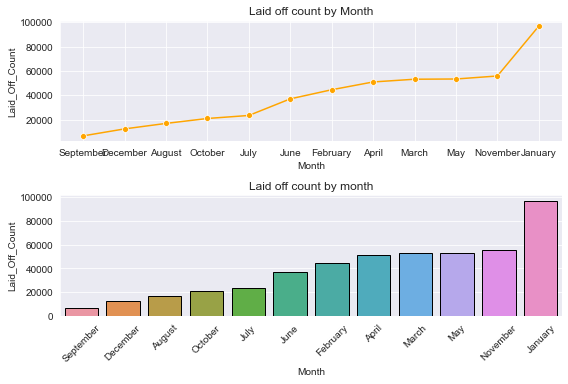

In [78]:
fig, ax = plt.subplots(2,1,figsize=(8,5))

ax[0] = sns.lineplot(data = df.groupby('Month')['Laid_Off_Count'].sum().sort_values(ascending =True).reset_index(),x='Month',y='Laid_Off_Count', marker ='o',color='orange', ax=ax[0])
ax[0].set(title ='Laid off count by Month')

ax[1] = sns.barplot(data = df.groupby('Month')['Laid_Off_Count'].sum().sort_values(ascending =True).reset_index(),x='Month',y='Laid_Off_Count',edgecolor='black',ax=ax[1])
ax[1].set(title ='Laid off count by month')


plt.tight_layout()
plt.xticks(rotation=45)
fig.show()

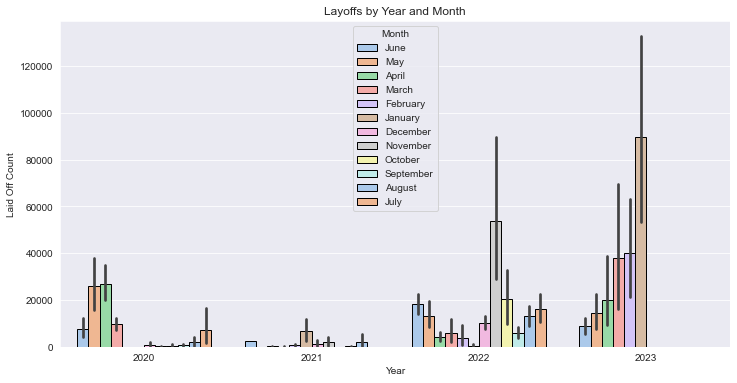

In [80]:
# analysis on year and month

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df, x='Year', y='Laid_Off_Count', hue='Month',estimator=sum, edgecolor='black', ax = ax, palette='pastel')
ax.set(title='Layoffs by Year and Month', ylabel='Laid Off Count')
plt.show()